In [5]:
# Modify the Python path to include the src directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime

# Import custom modules
# from utils import load_data, save_data
# from data_prepr
from data_preprocessing import DataPreprocessing
import utils


In [10]:
# Load the datasets
fraud_data = utils.load_data('Fraud_Data.csv')
credit_card_data = utils.load_data('creditcard.csv')
ip_address_data = utils.load_data('IpAddress_to_Country.csv')

In [11]:
# Check for missing values before handling them
print("Missing values in fraud_data before handling:")
print(fraud_data.isnull().sum())

Missing values in fraud_data before handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [12]:
print("Missing values in credit_card_data before handling:")
print(credit_card_data.isnull().sum())

Missing values in credit_card_data before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
print("Missing values in ip_address_data before handling:")
print(ip_address_data.isnull().sum())

Missing values in ip_address_data before handling:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [14]:
# Instantiate the DataPreprocessing class
dp_fraud = DataPreprocessing(fraud_data)
dp_credit = DataPreprocessing(credit_card_data)
dp_ip = DataPreprocessing(ip_address_data)

In [15]:
# Handle missing values
dp_fraud.handle_missing_values(method='drop')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [16]:
dp_credit.handle_missing_values(method='fill', fill_value=dp_credit.data.mean())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
dp_ip.handle_missing_values(method='drop')  # or method='fill' with appropriate fill_value

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [18]:
# Remove duplicates
dp_fraud.remove_duplicates()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [19]:
dp_credit.remove_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
dp_ip.remove_duplicates()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [21]:
# Correct data types
dp_fraud.correct_data_types()
# Assuming ip_address_data does not need datetime conversion
# Check data types before saving processed data
print("\nData types in fraud_data before saving processed data:")
print(dp_fraud.data.dtypes)


Data types in fraud_data before saving processed data:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [22]:
print("\nData types in credit_card_data before saving processed data:")
print(dp_credit.data.dtypes)


Data types in credit_card_data before saving processed data:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [23]:
print("\nData types in ip_address_data before saving processed data:")
print(dp_ip.data.dtypes)


Data types in ip_address_data before saving processed data:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [24]:
# Feature Engineering for Fraud Data
# Transaction frequency and velocity
dp_fraud.data['transaction_count'] = dp_fraud.data.groupby('user_id')['purchase_time'].transform('count')
dp_fraud.data['time_since_signup'] = (dp_fraud.data['purchase_time'] - dp_fraud.data['signup_time']).dt.total_seconds()
dp_fraud.data['transaction_velocity'] = dp_fraud.data['purchase_value'] / dp_fraud.data['time_since_signup']
dp_fraud.data['transaction_time_diff'] = (dp_fraud.data['purchase_time'] - dp_fraud.data['signup_time']).dt.total_seconds()

In [25]:
# Extract hour of the day and day of the week from purchase_time
dp_fraud.data['hour_of_day'] = dp_fraud.data['purchase_time'].dt.hour
dp_fraud.data['day_of_week'] = dp_fraud.data['purchase_time'].dt.dayofweek

In [27]:
# Encode categorical features
categorical_columns = ['source', 'browser', 'sex']
dp_fraud.encode_categorical(categorical_columns)

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,time_since_signup,...,transaction_time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,1,4506682.0,...,4506682.0,2,5,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,1,17944.0,...,17944.0,1,0,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,1,1.0,...,1.0,18,3,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,1,492085.0,...,492085.0,13,0,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,1,4361461.0,...,4361461.0,18,2,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,28,3.451155e+09,1,1,5261233.0,...,5261233.0,0,6,False,True,False,False,False,False,True
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,32,2.439047e+09,0,1,931270.0,...,931270.0,12,1,False,True,False,False,False,True,True
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,26,2.748471e+09,0,1,6681616.0,...,6681616.0,7,2,False,True,False,True,False,False,False
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,37,3.601175e+09,0,1,5146119.0,...,5146119.0,9,0,False,True,False,False,False,False,True


In [28]:
# Normalize and scale numerical features
numerical_features = ['purchase_value', 'transaction_count', 'age', 'transaction_time_diff', 'transaction_velocity', 'hour_of_day', 'day_of_week']
dp_fraud.normalize_and_scale(numerical_features)

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,time_since_signup,...,transaction_time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,7.327584e+08,0,0.0,4506682.0,...,-0.136057,-1.377455,0.991020,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,3.503114e+08,0,0.0,17944.0,...,-1.571877,-1.522122,-1.501259,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,0.0,1.0,...,-1.577617,0.937208,-0.005891,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3.840542e+09,0,0.0,492085.0,...,-1.420213,0.213876,-1.501259,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,4.155831e+08,0,0.0,4361461.0,...,-0.182509,0.937208,-0.504347,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,-0.596528,3.451155e+09,1,0.0,5261233.0,...,0.105303,-1.666788,1.489476,False,True,False,False,False,False,True
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,-0.132367,2.439047e+09,0,0.0,931270.0,...,-1.279730,0.069209,-1.002803,False,True,False,False,False,True,True
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,-0.828608,2.748471e+09,0,0.0,6681616.0,...,0.559643,-0.654123,-0.504347,False,True,False,True,False,False,False
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,0.447833,3.601175e+09,0,0.0,5146119.0,...,0.068481,-0.364790,-1.501259,False,True,False,False,False,False,True


## Exploratory Data Analysis (EDA)

### Univariate analysis

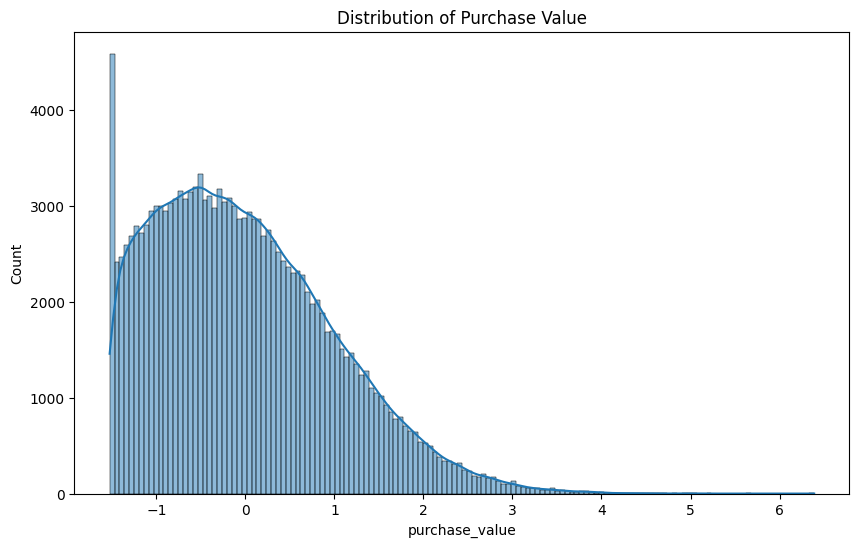

In [29]:
# Univariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.histplot(dp_fraud.data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

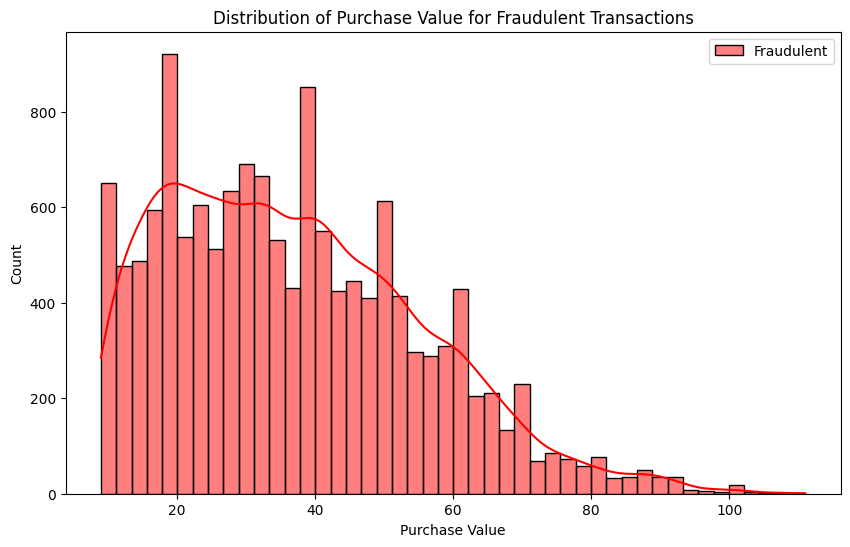

In [30]:
# Univariate analysis for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data[fraud_data['class'] == 1]['purchase_value'], kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Purchase Value for Fraudulent Transactions')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.legend()
plt.show()

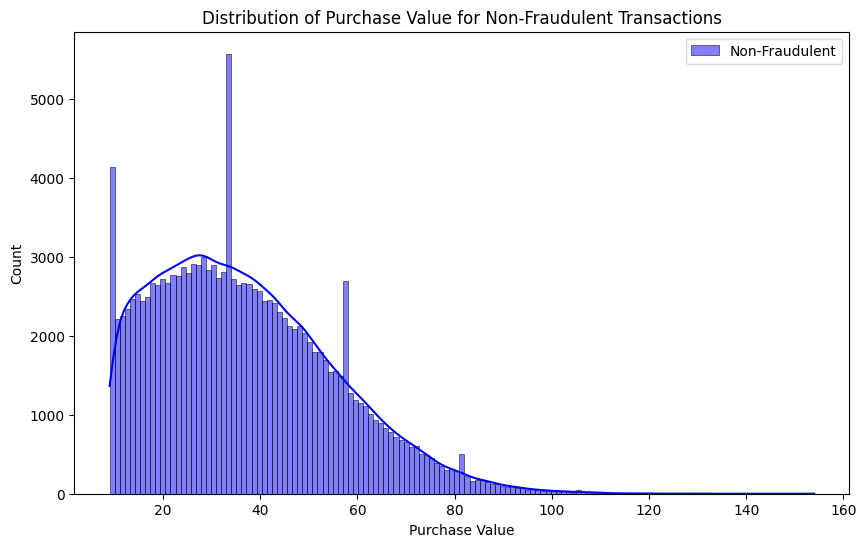

In [31]:
# Univariate analysis for non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data[fraud_data['class'] == 0]['purchase_value'], kde=True, color='blue', label='Non-Fraudulent')
plt.title('Distribution of Purchase Value for Non-Fraudulent Transactions')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.legend()
plt.show()

### Bivariate analysis

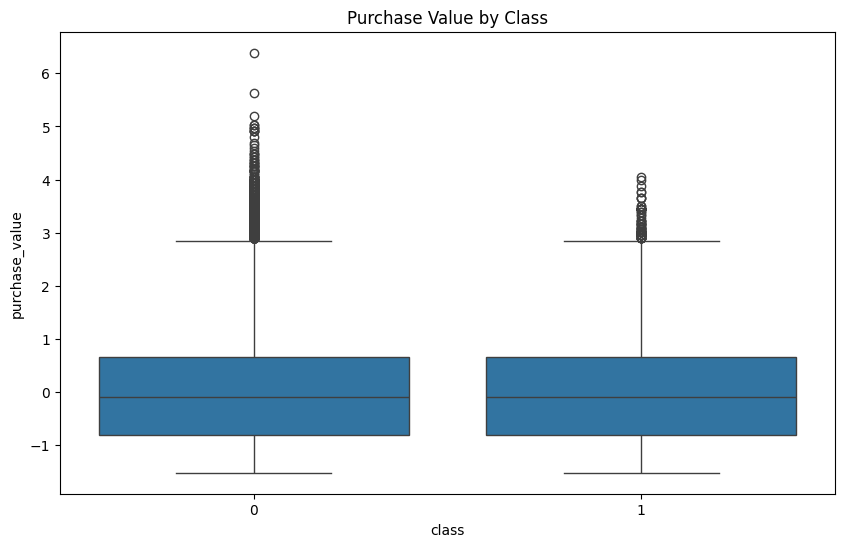

In [32]:
# Bivariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=dp_fraud.data)
plt.title('Purchase Value by Class')
plt.show()

In [33]:
print(ip_address_data.columns)

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


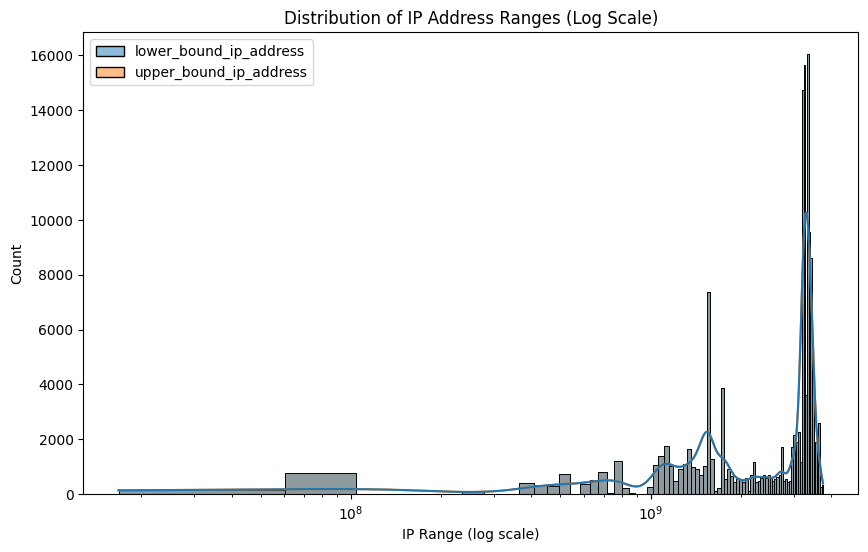

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(ip_address_data[['lower_bound_ip_address', 'upper_bound_ip_address']], kde=True)
plt.xscale('log')
plt.title('Distribution of IP Address Ranges (Log Scale)')
plt.xlabel('IP Range (log scale)')
plt.ylabel('Count')
plt.show()

<ipython-input-35-eb971987ed4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


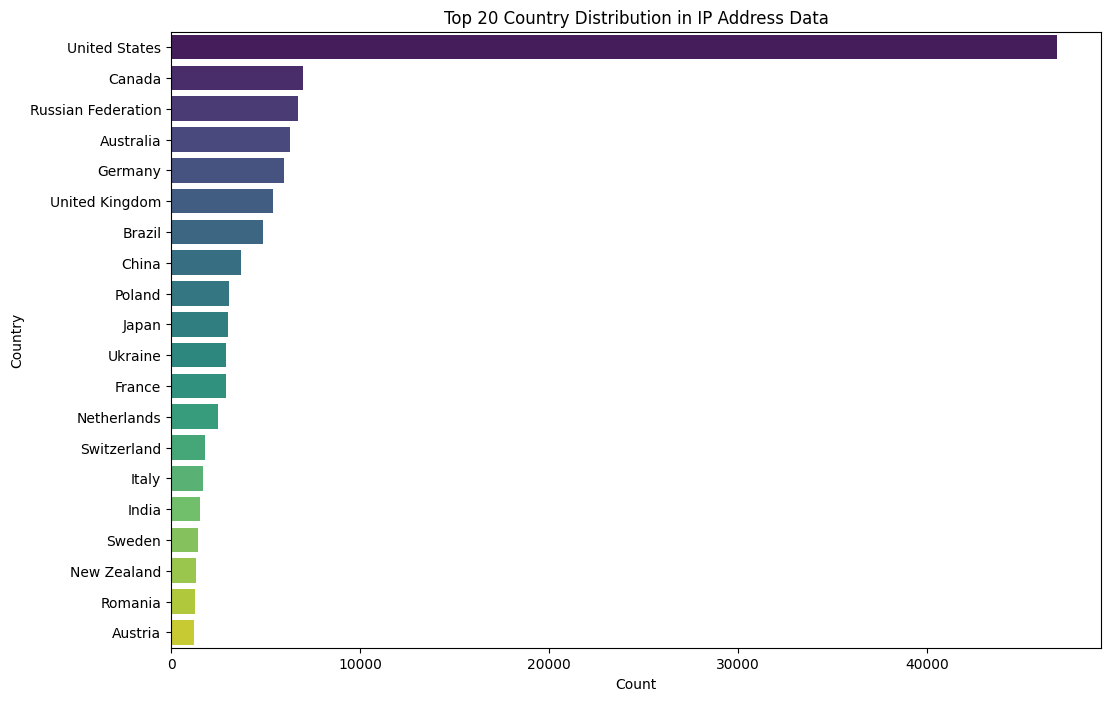

In [35]:
# Check and visualize top N countries by count
top_n_countries = 20
top_countries = ip_address_data['country'].value_counts().head(top_n_countries)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title(f'Top {top_n_countries} Country Distribution in IP Address Data')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [36]:
# Save the processed data
dp_fraud.data.to_csv('processed_fraud_data_with_country.csv', index=False)
dp_credit.data.to_csv('processed_credit_card_data.csv', index=False)